<a href="https://colab.research.google.com/github/mnatasha1402/ML-projects/blob/main/Mlp__project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assume that you are working in a consultancy company and one of your client is running an e-commerce company. They are interested in understanding the customer behavior regarding the shopping. They have already collected the users’ session data for a year. Each row belongs to a different user. The “Made_purchase” is an indicator that whether the user has made a purchase or not during that year. Your client is also interested in predicting that column using other attributes of the users. The client also informs you that the data is collected by non-experts. So, it might have some percentage of error in some columns.

Columns The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

HomePage: Number of times visited this page

HomePage_Duration: Total number of duration spent on this page.

LandingPage: Number of times visited this page

LandingPage_Duration: Total number of duration spent on this page.

ProductDesriptionPage Number of times visited this page

ProductDescriptionPage_Duration: Total number of duration spent on this page.

GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier,LogisticRegression,RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,VotingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB,CategoricalNB
# from sklearn.pipeline import

In [ ]:
test_data=pd.read_csv("/content/test_data_v2.csv")
train_data=pd.read_csv('/content/train_data_v2.csv.zip')
# test_data=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
# train_data=pd.read_csv('/kaggle/input/
test_data.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

In [ ]:

le=LabelEncoder()
oe=OrdinalEncoder()
pf=PolynomialFeatures(degree=2,interaction_only=True)
knn=KNNImputer(missing_values=np.nan,n_neighbors=5)
si=SimpleImputer(strategy='most_frequent')
si_cat=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
log_clf=LogisticRegression()
sgd_clf=SGDClassifier(penalty="elasticnet",learning_rate='optimal')
svm_clf=SVC(kernel='sigmoid',gamma='scale')
dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier(n_estimators=150,max_depth=6,random_state=42)
gb_clf = GaussianNB()

In [ ]:
train_data.head(100)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.2000,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.0500,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.0200,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.2000,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.2000,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,11.0,316.666667,0.0000,0.027273,0.0,0.8,...,2.0,2.0,1.0,Returning_Visitor,Male,ALL,Graduate,Single,0.0,False
96,0.0,0.0,0.0,0.0,20.0,873.736508,0.0075,0.028167,0.0,0.0,...,2.0,1.0,1.0,Returning_Visitor,Female,Required,Others,Married,0.0,False
97,0.0,0.0,0.0,0.0,4.0,16.000000,0.1000,0.150000,0.0,0.0,...,5.0,5.0,1.0,Returning_Visitor,Male,Deny,Graduate,Single,0.0,False
98,0.0,0.0,0.0,0.0,19.0,615.000000,0.0000,0.026316,0.0,0.2,...,2.0,3.0,3.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,False


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
train_data.rename(columns={'Type of Traffic': 'Type_of_Traffic', 'Cookies Setting': 'Cookies_Setting','Marital Status':"Marital_Status"}, inplace=True)
test_data.rename(columns={'Type of Traffic': 'Type_of_Traffic', 'Cookies Setting': 'Cookies_Setting','Marital Status':"Marital_Status"}, inplace=True)

In [ ]:
X_,y=train_data[train_data.columns[:-1]],train_data.Made_Purchase

In [ ]:
y.value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [ ]:
x_true=pd.DataFrame(columns=train_data.columns)

l=0
X_tr=[]
for i in train_data.index:
  if train_data[train_data.columns[-1]][i]==True:
     x_true.loc[i]=train_data.loc[i]

In [ ]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
# def preprocess(X):
num=[]
cat=[]
num_index=[]
cat_index=[]
for i in X_.columns:
  if X_[i].dtypes!='object':
    num.append(i)
    num_index.append(X_.columns.get_loc(i))
  else :
    cat.append(i)
    cat_index.append(X_.columns.get_loc(i))
# plt.scatter(X_['HomePage'],X_[num])

In [ ]:
dict(zip(cat, cat_index))

{'Month_SeasonalPurchase': 10,
 'CustomerType': 15,
 'Gender': 16,
 'Cookies_Setting': 17,
 'Education': 18,
 'Marital_Status': 19}

In [ ]:
dict(zip(num, num_index))

{'HomePage': 0,
 'HomePage_Duration': 1,
 'LandingPage': 2,
 'LandingPage_Duration': 3,
 'ProductDescriptionPage': 4,
 'ProductDescriptionPage_Duration': 5,
 'GoogleMetric:Bounce Rates': 6,
 'GoogleMetric:Exit Rates': 7,
 'GoogleMetric:Page Values': 8,
 'SeasonalPurchase': 9,
 'OS': 11,
 'SearchEngine': 12,
 'Zone': 13,
 'Type_of_Traffic': 14,
 'WeekendPurchase': 20}

In [ ]:
from pandas.plotting import scatter_matrix


In [ ]:
# for i in x_true.columns:
# scatter_matrix(x_true, figsize=(12, 8))


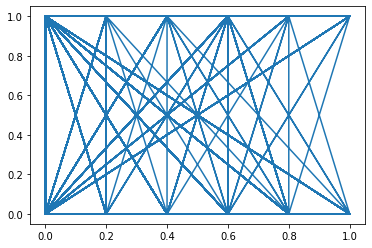

In [ ]:
plt.plot(X_.SeasonalPurchase,y)

1. Data  upload
2. data split into cat or num
3. preprocess : - Imputer : - OHE, KNN , Simple
4. train_slpit_
5. feature selection
6. model train
7. hypertuning
8.evaluation
9. submission

In [ ]:
cat# num_dat=X_new[num]

['Month_SeasonalPurchase',
 'CustomerType',
 'Gender',
 'Cookies_Setting',
 'Education',
 'Marital_Status']

<Axes: >

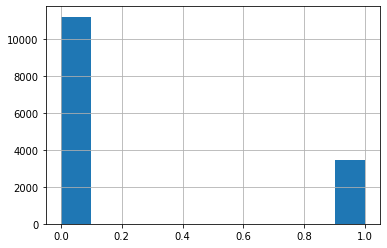

In [ ]:
X_.WeekendPurchase.hist()

In [ ]:
cat_pipe=Pipeline(steps=[('oe',oe),('impute',si_cat)])

  # for i in cat_data.columns:

  #   if i!='CustomerType':
  #     knn.fit_transform(np.asarray(cat_data[i]).reshape(-1,1))
  #   if i=='CustomerType':
  #     si_cat.fit_transform(np.asarray(cat_data[i]).reshape(-1,1))

pipe=Pipeline(steps=[('impute',si),('scale',MinMaxScaler())])
full_pipeline = ColumnTransformer([
            ("num_pipeline", pipe,num_index),
            ("cat_pipeline", cat_pipe,cat_index)])

In [ ]:
full_pipeline

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scale', MinMaxScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,
                                  20]),
                                ('cat_pipeline',
                                 Pipeline(steps=[('oe', OrdinalEncoder()),
                                                 ('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [10, 15, 16, 17, 18, 19])])

In [ ]:
X_new_tr=full_pipeline.fit_transform(X_)
# X_new_tr_df=pd.DataFrame(full_pipeline.fit_transform(X_),columns=X_new.columns)

In [ ]:
X_new_test=full_pipeline.fit_transform(test_data)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
X_train,X_test,y_train,y_test=train_test_split(X_new_tr,y,test_size=0.25,random_state=42)

In [ ]:
"""from xgboost import XGBClassifier
for clf in (RidgeClassifierCV(alphas=(0.1,1,10,100,1000)),log_clf,sgd_clf,svm_clf,rf_clf,gb_clf,LinearSVC(),XGBClassifier()):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_train)
  if accuracy_score(y_train,y_pred)>0.63:
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))
    cf=confusion_matrix(y_train,y_pred,labels=clf.classes_)

    dis=ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)
    dis.plot()
    plt.show()"""

'from xgboost import XGBClassifier\nfor clf in (RidgeClassifierCV(alphas=(0.1,1,10,100,1000)),log_clf,sgd_clf,svm_clf,rf_clf,gb_clf,LinearSVC(),XGBClassifier()):\n  clf.fit(X_train,y_train)\n  y_pred=clf.predict(X_train)\n  if accuracy_score(y_train,y_pred)>0.63:\n    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))\n    cf=confusion_matrix(y_train,y_pred,labels=clf.classes_)\n\n    dis=ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)\n    dis.plot()\n    plt.show()'

In [ ]:
clf=rf_clf
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print (y_pred,accuracy_score(y_test,y_pred))



[ True False False ... False False False] 0.6793374966060277


                              PREPROCESSING COMPLTED






geting best models

SELECTING BEST FEATURES

In [ ]:
from sklearn.feature_selection import RFECV


In [ ]:
selector1=RFECV(rf_clf,step=1,cv=7,min_features_to_select=13)
selector1.fit(X_train,y_train)

RFECV(cv=7,
      estimator=RandomForestClassifier(max_depth=6, n_estimators=150,
                                       random_state=42),
      min_features_to_select=13)

In [ ]:
selector1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True])

In [ ]:
selected_features = X_train[:, selector1.support_]

In [ ]:
selected_features.shape

(11048, 18)

In [ ]:
clf=rf_clf
clf.fit(selected_features,y_train)
y_pred=clf.predict(X_test[:, selector1.support_])
 # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)
print(y_pred)
"""print(clf.__class__.__name__,accuracy_score(y_test,y_pred),y_pred)
cf=classification_report(y_test,y_pred)
print(cf)
  """

[ True False False ... False False False]


'print(clf.__class__.__name__,accuracy_score(y_test,y_pred),y_pred)\ncf=classification_report(y_test,y_pred)\nprint(cf)\n  '

In [ ]:
clf=rf_clf
clf.fit(selected_features,y_train)
y_pred=clf.predict(X_train[:, selector1.support_])
  # print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)
print(y_pred)
print(clf.__class__.__name__,accuracy_score(y_train,y_pred))
cf=classification_report(y_train,y_pred)
print(cf)

[False False False ... False False  True]
RandomForestClassifier 0.6798515568428675
              precision    recall  f1-score   support

       False       0.67      0.94      0.78      6749
        True       0.74      0.28      0.40      4299

    accuracy                           0.68     11048
   macro avg       0.70      0.61      0.59     11048
weighted avg       0.70      0.68      0.63     11048



In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5,7],

#         }
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1,nfold=3,eval_metric='logloss')
# random_search_xgb = RandomizedSearchCV(xgb, param_distributions=params,  n_iter=3, scoring='roc_auc', n_jobs=4, cv=5,random_state=42,verbose=3)
# random_search_xgb.fit(X_train[:, selector1.support_], y_train)

In [ ]:
# best_estimator_xgb = random_search_xgb.best_estimator_
# print(random_search_xgb.best_estimator_)

# best_estimator_xgb.fit(X_train[:, selector1.support_], y_train)


In [ ]:
#from sklearn.model_selection import cross_val_score
# cross_val_score(best_estimator_xgb, X_train[:, selector1.support_],y_train,cv=5,scoring='accuracy')

In [ ]:
# pred_xgb = best_estimator_xgb.predict(X_test[:, selector1.support_])

In [ ]:
# accuracy = accuracy_score(y_test,pred_xgb)
# print("Accuracy:", accuracy)

In [ ]:
# y=best_estimator_xgb.predict(X_new_test[:, selector1.support_])

In [ ]:
# pr4=[]
# for i in y:
#     if(i==1):
#         pr4.append(True)
#     if(i==0):
#         pr4.append(False)

In [ ]:
# submission

In [ ]:
# sample=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")
# sample.head()
# submission=pd.DataFrame(columns=['id','Made_Purchase'])
# submission['id']=[i for i in range (len(y))]
# submission['Made_Purchase']=y
# submission.to_csv('submission.csv', index=False)

In [ ]:
#x_true,y_true=x_true[x_true.columns[:-1]],x_true.Made_Purchase

In [ ]:
#x_true_new=full_pipeline.fit_transform(x_true,y_true)

In [ ]:
#x_true_new

array([[0.11538462, 0.02584283, 0.        , ..., 1.        , 3.        ,
        0.        ],
       [0.38461538, 0.2958931 , 0.        , ..., 2.        , 2.        ,
        2.        ],
       [0.34615385, 0.03280618, 0.04166667, ..., 2.        , 3.        ,
        0.        ],
       ...,
       [0.07692308, 0.02224347, 0.08333333, ..., 2.        , 3.        ,
        2.        ],
       [0.        , 0.        , 0.        , ..., 2.        , 2.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# for clf in (RidgeClassifierCV(alphas=(0.1,1,10,100,1000)),log_clf,sgd_clf,svm_clf,rf_clf,gb_clf,LinearSVC(),XGBClassifier()):
#   clf.fit(x_true_new,y_true)
#   y_pred=clf.predict(x_true_new)
#   if (accuracy_score(y_true,y_pred))>0.63:
#     # print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
#     # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)
#     print(y_pred)
#     print(clf.__class__.__name__,accuracy_score(y_true,y_pred))
#     cf=classification_report(y_true,y_pred)
#     print(cf)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#kn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
# y_cls=kn.fit(x_true_new,y_true)

In [ ]:
# print(y_cls.max())

In [ ]:
# y_cl=kn.predict(X_test)

In [ ]:
# cf=classification_report(y_test,y_cl)
# print(cf)

In [ ]:
from sklearn.neighbors import KNeighborsTransformer
knn_ = KNeighborsTransformer(n_neighbors=5, mode='distance')

# fit the transformer on the dataset
knn_.fit(X_train)

# transform the dataset
transformed_data = (knn_.fit_transform(X_train))

In [ ]:
"""for clf in (log_clf,sgd_clf,LinearSVC()):
  clf.fit(transformed_data,y_train)
  y_pred=clf.predict(transformed_data)
  if (accuracy_score(y_train,y_pred))>0.63:
    # print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
    # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)
    print(y_pred)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))
    cf=classification_report(y_train,y_pred)
    print(cf)"""

'for clf in (log_clf,sgd_clf,LinearSVC()):\n  clf.fit(transformed_data,y_train)\n  y_pred=clf.predict(transformed_data)\n  if (accuracy_score(y_train,y_pred))>0.63:\n    # print(clf.__class__.__name__,accuracy_score(y_test,y_pred))\n    # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)\n    print(y_pred)\n    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))\n    cf=classification_report(y_train,y_pred)\n    print(cf)'

In [ ]:
clf=LinearSVC()
clf.fit(transformed_data,y_train)
y_pred=clf.predict(transformed_data)
print(y_pred)
print(clf.__class__.__name__,accuracy_score(y_train,y_pred))
cf=classification_report(y_train,y_pred)
print(cf)

[False False False ...  True False False]
LinearSVC 0.8054851556842868
              precision    recall  f1-score   support

       False       0.80      0.91      0.85      6749
        True       0.82      0.64      0.72      4299

    accuracy                           0.81     11048
   macro avg       0.81      0.77      0.78     11048
weighted avg       0.81      0.81      0.80     11048



In [ ]:
#transformed_data_test = knn_.fit_transform(X_test)

In [ ]:
"""clf=rf_clf
clf.fit(transformed_data,y_train)
y_pred=clf.predict(transformed_data)
print(accuracy_score(y_train,y_pred))
print(y_pred)"""

0.6108797972483707
[False False False ... False False False]


In [ ]:
"""for clf in (log_clf,sgd_clf,LinearSVC()):
  clf.fit(transformed_data,y_train)
  y_pred=clf.predict(transformed_data_test)

    # print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
    # cf=confusion_matrix(y_test,y_pred,labels=clf.classes_)
  print(y_pred)"""
  """print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  cf=classification_report(y_test,y_pred)
  print(cf)"""

IndentationError: ignored

In [ ]:
#test=full_pipeline.fit_transform(test_data)